In [1]:
#Importing required libraries
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn import metrics
from sklearn import tree

#Loading the iris data
data = load_iris()
print('Classes to predict: ', data.target_names)
print('Features: ', data.feature_names)


Classes to predict:  ['setosa' 'versicolor' 'virginica']
Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [13]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:

import pandas as pd
iris = pd.DataFrame(data.data)
print(iris.head())

iris.columns = data.feature_names
iris.head()


     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
iris['class'] = data.target
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
#Extracting data attributes
X = iris.iloc[:,0:4]
### Extracting target/ class labels
y = iris.iloc[:,4] 

print('Number of examples in the data:', X.shape)

#First four rows in the variable 'X'
print(X[:4])
y.head(4)


Number of examples in the data: (150, 4)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2


0    0
1    0
2    0
3    0
Name: class, dtype: int32

In [6]:
"""
#Extracting data attributes
X = data.data
### Extracting target/ class labels
y = data.target

print('Number of examples in the data:', X.shape)

#First four rows in the variable 'X'
print(X[:4])

"""

"\n#Extracting data attributes\nX = data.data\n### Extracting target/ class labels\ny = data.target\n\nprint('Number of examples in the data:', X.shape)\n\n#First four rows in the variable 'X'\nprint(X[:4])\n\n"

In [15]:
#Using the train_test_split to create train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 20, train_size = 0.7)

#Importing the Decision tree classifier from the sklearn library.
#from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

#Training the decision tree classifier. 
clf.fit(X_train, y_train)

#Predicting labels on the test set.
y_pred_test =  clf.predict(X_test)




In [16]:
#Importing the accuracy metric from sklearn.metrics library
from sklearn.metrics import accuracy_score
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train))*100)
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred_test)*100)


Accuracy Score on train data:  100.0
Accuracy Score on test data:  93.75


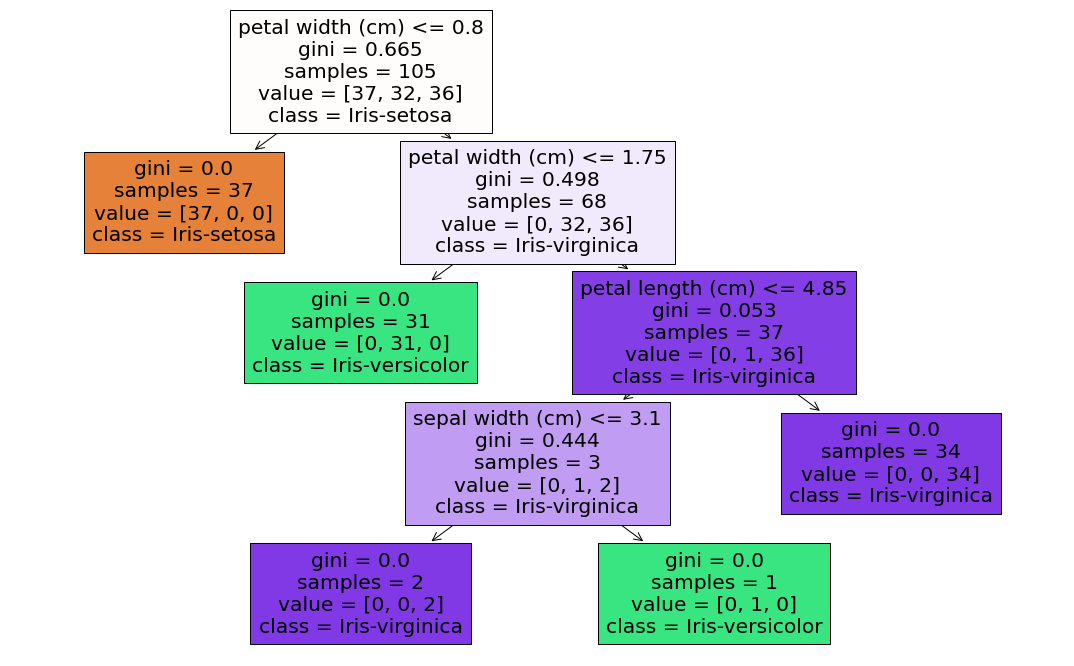

In [12]:
from sklearn.tree import plot_tree
plt.figure(figsize=(19,12))
features = iris.columns
classes = ['Iris-setosa','Iris-versicolor', 'Iris-virginica']
plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

In [17]:
#k-fold cross validation configurations-Manually
#Extract a holdout set at the very begining
#Extracting data attributes
X = data.data
### Extracting target/ class labels
y = data.target
X_train_set, X_holdout, y_train_set, y_holdout = train_test_split(X, y, 
                                stratify = y, random_state = 20, train_size = 0.7)
 
#Get input and output datasets values in X and Y variables
X = X_train_set
y = y_train_set 


#Initialize k-fold cross validation configurations
kf = KFold(n_splits=5, shuffle=True, random_state=20)
 
scores = []
dt = DecisionTreeClassifier(criterion='gini', max_depth = 2, \
                        min_samples_leaf = 0.10, random_state = 20)
for train_index, test_index in kf.split(X):
    #print("Train index: {0}, \nTest index: {1}".format(train_index, test_index))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
 
    dt.fit(X_train, y_train)
    scores.append(dt.score(X_test, y_test))

print("The cross-validation scores using custom method are \n{0}".format(scores))

 

print("Mean of k-fold scores using custom method is {0}".format(np.mean(scores)))


The cross-validation scores using custom method are 
[0.9523809523809523, 0.9047619047619048, 1.0, 0.8095238095238095, 1.0]
Mean of k-fold scores using custom method is 0.9333333333333333


In [18]:
#k-fold cross validation configurations-cross_val_score fn
scores = cross_val_score(dt, X, y, cv = 5)
print("The cross-validation scores using cross_val_score method are \n{0}".format(scores))

print("Mean of k-fold scores using cross_val_score method is {0}".format(np.mean(scores)))


The cross-validation scores using cross_val_score method are 
[1.        0.9047619 0.9047619 1.        0.9047619]
Mean of k-fold scores using cross_val_score method is 0.9428571428571428
